In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

## 1. 卷积

In [3]:
img = np.ones((5,5))
kernel = np.ones((3,3))

print(img)
print(kernel)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [4]:
img2 = cv.filter2D(img, -1, kernel)
print(img2)

[[9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]]


## 2. 均值滤波

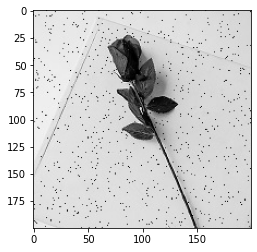

In [5]:
img = cv.imread('pic/rose_spnoise_200x200.jpg')
show(img)

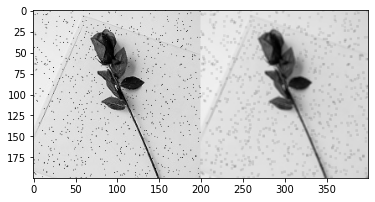

In [6]:
K = np.ones((3,3)) / 9

img1 = cv.filter2D(img, -1, K)
show(np.hstack([img, img1]))

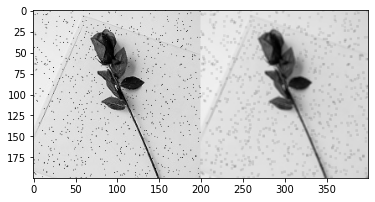

In [7]:
img2 = cv.blur(img, (3,3))
show(np.hstack([img, img2]))

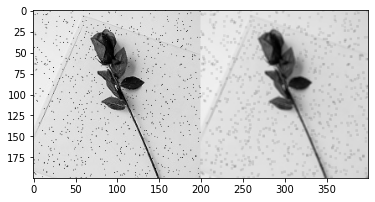

In [8]:
img3 = cv.boxFilter(img, -1, (3,3))
show(np.hstack([img, img3]))

## 3. 中值模糊

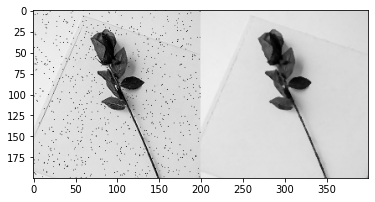

In [9]:
img4 = cv.medianBlur(img, 3)
show(np.hstack([img, img4]))

## 4. 高斯滤波

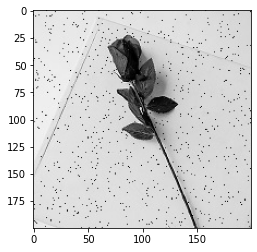

In [20]:
img = cv.imread('pic/rose_spnoise_200x200.jpg')
show(img)

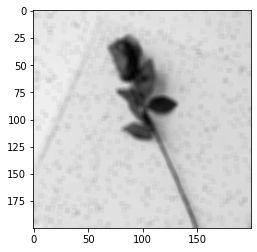

In [23]:
sigma = 100

img2 = cv.GaussianBlur(img, (5,5), sigmaX=sigma)
show(img2)

## 5. 双边滤波

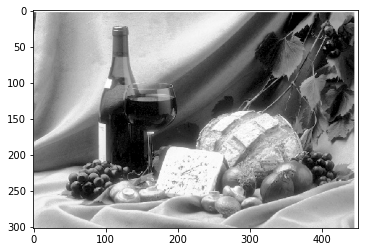

In [27]:
img = cv.imread('pic/beer.jpg', 0)
show(img)

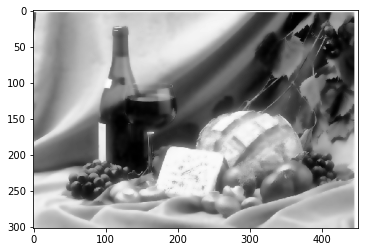

In [38]:
img2 = cv.bilateralFilter(img, -1, sigmaColor=50, sigmaSpace=3)
show(img2)

## 6. 双边滤波实现

$$
c(\xi - x) = e^{-0.5(\frac{\lVert \xi-x \rVert}{\sigma_d})^2}
$$

In [3]:
def get_C(sigmad, n):
    C = np.zeros((n,n))
    
    # 0, 1, 2
    x = np.array([n//2, n//2])
    for i in range(n):
        for j in range(n):
            ksi = np.array([i, j])
            C[i,j] = np.exp(-0.5 * (np.linalg.norm(ksi - x) / sigmad)**2)
            
    C /= C.sum()
    return C

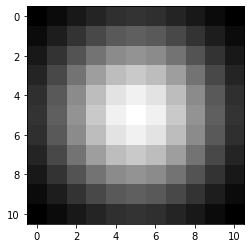

In [4]:
C = get_C(3, 11)
show(C)

$$
s(f(\xi)- f(x)) = e^{-0.5(\frac{\lVert f(\xi)-f(x) \rVert}{\sigma_r})^2}
$$

In [24]:
def get_S(f, sigmar, n):
    S = np.zeros((n,n))
    
    f = np.float64(f)
    for i in range(n):
        for j in range(n):
            S[i,j] = np.exp(-0.5 * ((f[i,j] - f[n//2, n//2]) / sigmar)**2)
            
    S /= S.sum()
    return S

In [25]:
def get_S2(f, sigmar, n):
    f = np.float64(f)
    
    S = np.exp(-0.5 * ((f - f[n//2, n//2]) / sigmar)**2)
            
    S /= S.sum()
    return S

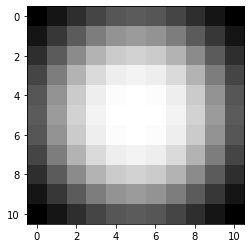

In [26]:
S1 = get_S(C, 10, 11)
show(S1)

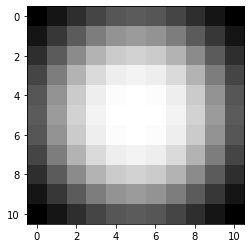

In [27]:
S2 = get_S2(C, 10, 11)
show(S2)

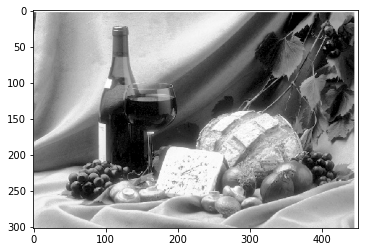

In [28]:
img = cv.imread('pic/beer.jpg', 0)
show(img)

In [29]:
sigmar = 50
sigmad = 3
n = 11

h, w = img.shape
img2 = np.zeros_like(img)

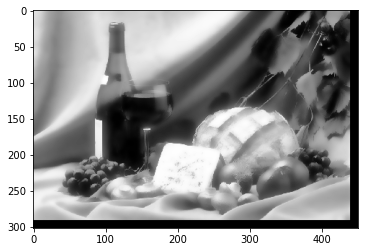

Wall time: 57.5 s


In [36]:
%%time


C = get_C(sigmad, n)

for i in range(h-n):
    for j in range(w-n):
        f = img[i:i+n, j:j+n]
        S = get_S(f, sigmar, n)
        K = C * S
        K /= K.sum()
        img2[i,j] = (f * K).sum()

show(img2)

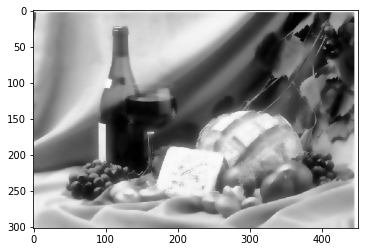

Wall time: 174 ms


In [33]:
%%time

img3 = cv.bilateralFilter(img, 11, sigmaColor=50, sigmaSpace=3)
show(img3)

In [35]:
cv.imwrite('test/bilateral.jpg', np.hstack([img, img2, img3]).astype(np.uint8))

True